# Histopathologic Cancer Detection

The goal of this project is to create an algorithm to identify metastatic cancer in small image patches taken from larger digital pathology scans.

This project was built as a submission to this Kaggle competition: https://www.kaggle.com/c/histopathologic-cancer-detection/overview

## Setup

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
from keras import layers
from keras import ops

import jupyter_black

jupyter_black.load()

colors = ["#0a9396", "#ca6702"]


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/jollyjerr/code/@school/cnn_cancer_detection/venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/jollyjerr/code/@school/cnn_cancer_detection/venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/jollyjerr/code/@school/cnn_cancer_detection/venv/lib/python3.11/sit

## Problem Analysis

In [2]:
train_labels = pd.read_csv("train_labels.csv")
train_labels.info()

print(f"\n Missing Values: \n {train_labels.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB

 Missing Values: 
 id       0
label    0
dtype: int64


## EDA

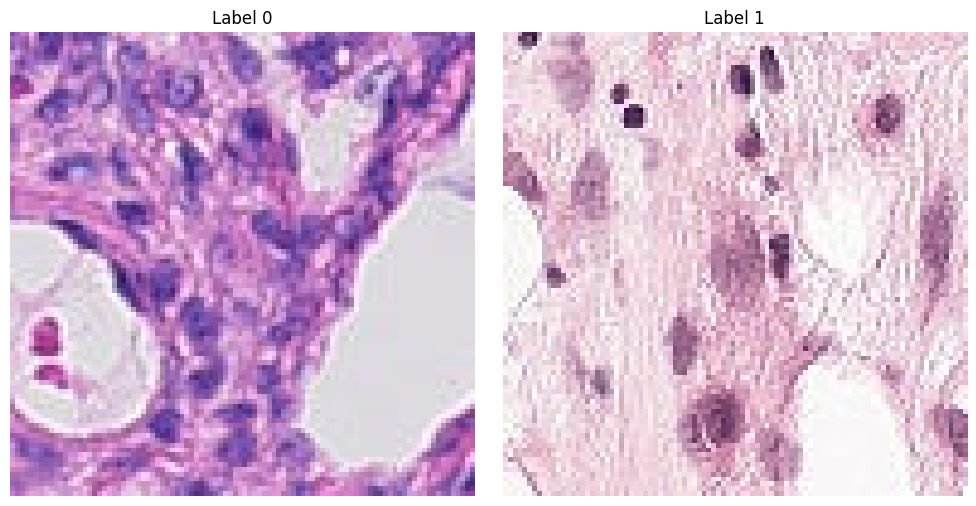

In [3]:
idx = 2
id_0 = train_labels[train_labels["label"] == 0].iloc[idx]["id"]
id_1 = train_labels[train_labels["label"] == 1].iloc[idx]["id"]
image_0 = mpimg.imread(f"train/{id_0}.tif")
image_1 = mpimg.imread(f"train/{id_1}.tif")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_0)
axes[0].set_title("Label 0")
axes[0].axis("off")
axes[1].imshow(image_1)
axes[1].set_title("Label 1")
axes[1].axis("off")

plt.tight_layout()
plt.show()

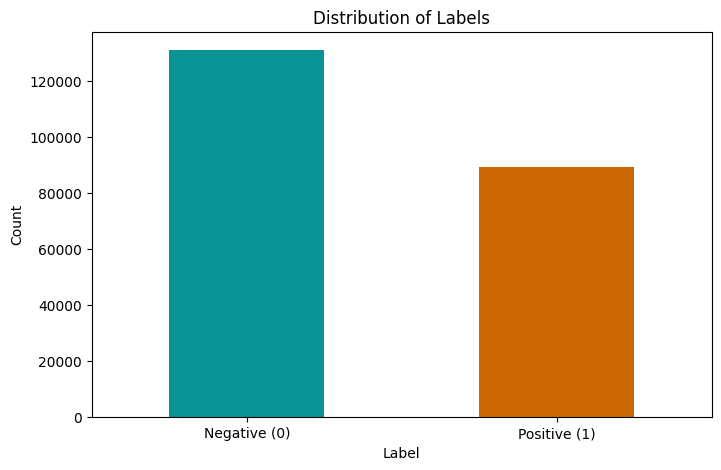

In [4]:
label_distribution = train_labels["label"].value_counts()
label_distribution.plot(kind="bar", color=colors, figsize=(8, 5))
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Negative (0)", "Positive (1)"], rotation=0)
plt.show()

## Model Architecture

In [11]:
input_shape = (32, 32, 3)
num_classes = 1  # Binary classification (tumor present or not)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 543,937 (2.07 MB)

 Trainable params: 543,937 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

## Results and Analysis

## Conclusion